In [1]:
!ls -Rl

.:
total 11016
-rwxrwxrwx 1 angelrps angelrps 7369019 Apr  7 19:34 Data_Analysis.ipynb
-rwxrwxrwx 1 angelrps angelrps  362020 Jun 16 17:29 Data_Analysis_Weather.ipynb
-rwxrwxrwx 1 angelrps angelrps   10144 Apr  8 17:19 HowToTackleDataScienceChallenge.ipynb
-rwxrwxrwx 1 angelrps angelrps 3527394 Jun 12 11:59 TSA.ipynb


In [2]:
# count lines
!wc -l ../z_resources/data_test/NOAA_CentralPark_Weather.csv
# the file has 26289 lines

36036 ../z_resources/data_test/NOAA_CentralPark_Weather.csv


In [3]:
!head -5 ../z_resources/data_test/NOAA_CentralPark_Weather.csv

"STATION","DATE","REPORT_TYPE","SOURCE","AWND","BackupDirection","BackupDistance","BackupDistanceUnit","BackupElements","BackupElevation","BackupElevationUnit","BackupEquipment","BackupLatitude","BackupLongitude","BackupName","CDSD","CLDD","DSNW","DailyAverageDewPointTemperature","DailyAverageDryBulbTemperature","DailyAverageRelativeHumidity","DailyAverageSeaLevelPressure","DailyAverageStationPressure","DailyAverageWetBulbTemperature","DailyAverageWindSpeed","DailyCoolingDegreeDays","DailyDepartureFromNormalAverageTemperature","DailyHeatingDegreeDays","DailyMaximumDryBulbTemperature","DailyMinimumDryBulbTemperature","DailyPeakWindDirection","DailyPeakWindSpeed","DailyPrecipitation","DailySnowDepth","DailySnowfall","DailySustainedWindDirection","DailySustainedWindSpeed","DailyWeather","HDSD","HTDD","HeavyFog","HourlyAltimeterSetting","HourlyDewPointTemperature","HourlyDryBulbTemperature","HourlyPrecipitation","HourlyPresentWeatherType","HourlyPressureChange","HourlyPressureTendency","Ho

# 2. Study the Data

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use("seaborn")                  # Set seaborn graphic style as default
pd.options.display.max_columns = None
pd.options.display.max_rows = None

#### 1. Overall inspection

In [4]:
# 1. Overall inspection
dfw = pd.read_csv('../z_resources/data_test/NOAA_CentralPark_Weather.csv',
                  sep=',')
dfw.tail(30)

/home/angelrps/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,25,26,27,28,30,31,33,42,43,48,53,71,75,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupElevationUnit,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,CDSD,CLDD,DSNW,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,DailyCoolingDegreeDays,DailyDepartureFromNormalAverageTemperature,DailyHeatingDegreeDays,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,DailyWeather,HDSD,HTDD,HeavyFog,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed,MonthlyAverageRH,MonthlyDaysWithGT001Precip,MonthlyDaysWithGT010Precip,MonthlyDaysWithGT32Temp,MonthlyDaysWithGT90Temp,MonthlyDaysWithLT0Temp,MonthlyDaysWithLT32Temp,MonthlyDepartureFromNormalAverageTemperature,MonthlyDepartureFromNormalCoolingDegreeDays,MonthlyDepartureFromNormalHeatingDegreeDays,MonthlyDepartureFromNormalMaximumTemperature,MonthlyDepartureFromNormalMinimumTemperature,MonthlyDepartureFromNormalPrecipitation,MonthlyDewpointTemperature,MonthlyGreatestPrecip,MonthlyGreatestPrecipDate,MonthlyGreatestSnowDepth,MonthlyGreatestSnowDepthDate,MonthlyGreatestSnowfall,MonthlyGreatestSnowfallDate,MonthlyMaxSeaLevelPressureValue,MonthlyMaxSeaLevelPressureValueDate,MonthlyMaxSeaLevelPressureValueTime,MonthlyMaximumTemperature,MonthlyMeanTemperature,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureValueDate,MonthlyMinSeaLevelPressureValueTime,MonthlyMinimumTemperature,MonthlySeaLevelPressure,MonthlyStationPressure,MonthlyTotalLiquidPrecipitation,MonthlyTotalSnowfall,MonthlyWetBulb,NormalsCoolingDegreeDay,NormalsHeatingDegreeDay,REM,REPORT_TYPE.1,SOURCE.1,ShortDurationEndDate005,ShortDurationEndDate010,ShortDurationEndDate015,ShortDurationEndDate020,ShortDurationEndDate030,ShortDurationEndDate045,ShortDurationEndDate060,ShortDurationEndDate080,ShortDurationEndDate100,ShortDurationEndDate120,ShortDurationEndDate150,ShortDurationEndDate180,ShortDurationPrecipitationValue005,ShortDurationPrecipitationValue010,ShortDurationPrecipitationValue015,ShortDurationPrecipitationValue020,ShortDurationPrecipitationValue030,ShortDurationPrecipitationValue045,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,TStorms,WindEquipmentChangeDate
36005,72505394728,2019-12-31T01:51:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.74,34,37,0.00,NaN,NaN,NaN,89,29.71,OVC:08 12,29.57,10.00,36,VRB,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET09512/31/19 01:51:02 METAR KNYC 310651Z VRB...,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36006,72505394728,2019-12-31T02:51:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.75,34,37,0.00,NaN,NaN,NaN,89,29.72,OVC:08 11,29.58,10.00,36,VRB,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET09512/31/19 02:51:02 METAR KNYC 310751Z VRB...,FM-15,7,NaN,NaN,NaN,NaN,NaN,

In [5]:
# There are too many columns, lets check one by one
#1 DATE
#2 HourlyDryBulbTemperature (in Farenheit)
#3 HourlyPrecipitation (in inches to hundredths)
#4 DailySnowDepth

list(dfw.columns)

['STATION',
 'DATE',
 'REPORT_TYPE',
 'SOURCE',
 'AWND',
 'BackupDirection',
 'BackupDistance',
 'BackupDistanceUnit',
 'BackupElements',
 'BackupElevation',
 'BackupElevationUnit',
 'BackupEquipment',
 'BackupLatitude',
 'BackupLongitude',
 'BackupName',
 'CDSD',
 'CLDD',
 'DSNW',
 'DailyAverageDewPointTemperature',
 'DailyAverageDryBulbTemperature',
 'DailyAverageRelativeHumidity',
 'DailyAverageSeaLevelPressure',
 'DailyAverageStationPressure',
 'DailyAverageWetBulbTemperature',
 'DailyAverageWindSpeed',
 'DailyCoolingDegreeDays',
 'DailyDepartureFromNormalAverageTemperature',
 'DailyHeatingDegreeDays',
 'DailyMaximumDryBulbTemperature',
 'DailyMinimumDryBulbTemperature',
 'DailyPeakWindDirection',
 'DailyPeakWindSpeed',
 'DailyPrecipitation',
 'DailySnowDepth',
 'DailySnowfall',
 'DailySustainedWindDirection',
 'DailySustainedWindSpeed',
 'DailyWeather',
 'HDSD',
 'HTDD',
 'HeavyFog',
 'HourlyAltimeterSetting',
 'HourlyDewPointTemperature',
 'HourlyDryBulbTemperature',
 'HourlyPrec

#### 2. For now I am just going to take 2 columns: DATE and PRECIPITATION.

In [69]:
# I SUMMARIZE ALL STEPS IN EACH CELL TO AVOID CONFLICTS OF UNTRACKED DF CHANGES

# 1. Overall inspection
dfw = pd.read_csv('../z_resources/data_test/NOAA_CentralPark_Weather.csv',
                  sep=',')
    # Separator is ','
    
# 2. For now I am just going to take 2 columns: DATE and PRECIPITATION.
dfw = dfw[['DATE','HourlyPrecipitation']]
dfw.info(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36035 entries, 0 to 36034
Data columns (total 2 columns):
DATE                   36035 non-null object
HourlyPrecipitation    30099 non-null object
dtypes: object(2)
memory usage: 563.2+ KB


,DATE,HourlyPrecipitation
0,2017-01-01T00:51:00,0.00
1,2017-01-01T01:51:00,T
2,2017-01-01T02:51:00,0.00
3,2017-01-01T03:51:00,0.00
4,2017-01-01T04:51:00,0.00
5,2017-01-01T05:51:00,0.00
6,2017-01-01T06:51:00,0.00
7,2017-01-01T07:51:00,0.00
8,2017-01-01T08:51:00,0.00
9,2017-01-01T09:51:00,0.00


#### 3. Manage NaNs

In [71]:
# I SUMMARIZE ALL STEPS IN EACH CELL TO AVOID CONFLICTS OF UNTRACKED DF CHANGES

# 1. Overall inspection
dfw = pd.read_csv('../z_resources/data_test/NOAA_CentralPark_Weather.csv',
                  sep=',')
    # Separator is ','
    
# 2. For now I am just going to take 2 columns: DATE and PRECIPITATION.
dfw = dfw[['DATE','HourlyPrecipitation']]

# 3. Manage NaNs 
dfw.isnull().sum()
    # there are 5936 NaNs in Precipitation (16% of rows). I will convert them to 0 as if there was no precipitation.
    # I think this is better than removing 16% of the rows.
dfw['HourlyPrecipitation'].fillna('0.00', inplace=True)
dfw.tail(10)

,DATE,HourlyPrecipitation
0,2017-01-01T00:51:00,0.00
1,2017-01-01T01:51:00,T
2,2017-01-01T02:51:00,0.00
3,2017-01-01T03:51:00,0.00
4,2017-01-01T04:51:00,0.00
5,2017-01-01T05:51:00,0.00
6,2017-01-01T06:51:00,0.00
7,2017-01-01T07:51:00,0.00
8,2017-01-01T08:51:00,0.00
9,2017-01-01T09:51:00,0.00


#### 4. Replace 'T' values of HourlyPrecipitation by 0.

In [72]:
# I SUMMARIZE ALL STEPS IN EACH CELL TO AVOID CONFLICTS OF UNTRACKED DF CHANGES

# 1. Overall inspection
dfw = pd.read_csv('../z_resources/data_test/NOAA_CentralPark_Weather.csv',
                  sep=',')
    # Separator is ','
    
# 2. For now I am just going to take 2 columns: DATE and PRECIPITATION.
dfw = dfw[['DATE','HourlyPrecipitation']]

# 3. Manage NaNs 
dfw.isnull().sum()
    # there are 5936 NaNs in Precipitation (16% of rows). I will convert them to 0 as if there was no precipitation.
    # I think this is better than removing 16% of the rows.
dfw['HourlyPrecipitation'].fillna('0.00', inplace=True)

# 4. Replace 'T' values of HourlyPrecipitation by 0.
dfw.loc[(dfw.HourlyPrecipitation == 'T'), 'HourlyPrecipitation'] = '0.00'
dfw.tail(10)

,DATE,HourlyPrecipitation
36025,2019-12-31T16:51:00,0.00
36026,2019-12-31T17:51:00,0.00
36027,2019-12-31T18:51:00,0.00
36028,2019-12-31T19:51:00,0.00
36029,2019-12-31T20:51:00,0.02
36030,2019-12-31T21:51:00,0.00
36031,2019-12-31T22:51:00,0.00
36032,2019-12-31T23:51:00,0.00
36033,2019-12-31T23:59:00,0.00
36034,2019-12-31T23:59:00,0.00


#### 5. Remove trailing 's' from some Precipitation values

In [123]:
# I SUMMARIZE ALL STEPS IN EACH CELL TO AVOID CONFLICTS OF UNTRACKED DF CHANGES

# 1. Overall inspection
dfw = pd.read_csv('../z_resources/data_test/NOAA_CentralPark_Weather.csv',
                  sep=',')
    # Separator is ','. There are NaNs.
    
# 2. For now I am just going to take 2 columns: DATE and PRECIPITATION.
dfw = dfw[['DATE','HourlyPrecipitation']]

# 3. Manage NaNs 
dfw.isnull().sum()
    # there are 5936 NaNs in Precipitation (16% of rows). I will convert them to 0 as if there was no precipitation.
    # I think this is better than removing 16% of the rows.
dfw['HourlyPrecipitation'].fillna('0.00', inplace=True)

# 4. Replace 'T' values of HourlyPrecipitation by 0.00
dfw.loc[(dfw.HourlyPrecipitation == 'T'), 'HourlyPrecipitation'] = '0.00'

# 5. Remove trailing 's' from some Precipitation values
dfw['HourlyPrecipitation'] = dfw['HourlyPrecipitation'].str.replace('s', '')

s = dfw.HourlyPrecipitation.str.contains('s')
dfw[s] # should be none

,DATE,HourlyPrecipitation


#### 6. Convert to right data type and units.

In [173]:
# I SUMMARIZE ALL STEPS IN EACH CELL TO AVOID CONFLICTS OF UNTRACKED DF CHANGES

# 1. Overall inspection
dfw = pd.read_csv('../z_resources/data_test/NOAA_CentralPark_Weather.csv',
                  sep=',')
    # Separator is ','. There are NaNs.
    
# 2. For now I am just going to take 2 columns: DATE and PRECIPITATION.
dfw = dfw[['DATE','HourlyPrecipitation']]

# 3. Manage NaNs 
dfw.isnull().sum()
    # there are 5936 NaNs in Precipitation (16% of rows). I will convert them to 0 as if there was no precipitation.
    # I think this is better than removing 16% of the rows.
dfw['HourlyPrecipitation'].fillna('0.00', inplace=True)

# 4. Replace 'T' values of HourlyPrecipitation by 0.00
dfw.loc[(dfw.HourlyPrecipitation == 'T'), 'HourlyPrecipitation'] = '0.00'

# 5. Remove trailing 's' from some Precipitation values
    # I got this error when trying to convert string to float: '0.05s'
    # According to the Data Dictionary s = suspect value (appears with value) 
    # I will remove any trailing 's'.
dfw['HourlyPrecipitation'] = dfw['HourlyPrecipitation'].str.replace('s', '')

# 6. Convert to right data type and units.
dfw['DATE'] = pd.to_datetime(dfw['DATE'])
dfw['HourlyPrecipitation'] = pd.to_numeric(dfw['HourlyPrecipitation'])

dfw.info(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36035 entries, 0 to 36034
Data columns (total 2 columns):
DATE                   36035 non-null datetime64[ns]
HourlyPrecipitation    36035 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 563.2 KB


#### 7. Set timestamp as index to visualize time series

In [191]:
# I SUMMARIZE ALL STEPS IN EACH CELL TO AVOID CONFLICTS OF UNTRACKED DF CHANGES

# 1. Overall inspection
dfw = pd.read_csv('../z_resources/data_test/NOAA_CentralPark_Weather.csv',
                  sep=',')
    # Separator is ','. There are NaNs.
    
# 2. For now I am just going to take 2 columns: DATE and PRECIPITATION.
dfw = dfw[['DATE','HourlyPrecipitation']]

# 3. Manage NaNs 
dfw.isnull().sum()
    # there are 5936 NaNs in Precipitation (16% of rows). I will convert them to 0 as if there was no precipitation.
    # I think this is better than removing 16% of the rows.
dfw['HourlyPrecipitation'].fillna('0.00', inplace=True)

# 4. Replace 'T' values of HourlyPrecipitation by 0.00
dfw.loc[(dfw.HourlyPrecipitation == 'T'), 'HourlyPrecipitation'] = '0.00'

# 5. Remove trailing 's' from some Precipitation values
    # I got this error when trying to convert string to float: '0.05s'
    # According to the Data Dictionary s = suspect value (appears with value) 
    # I will remove any trailing 's'.
dfw['HourlyPrecipitation'] = dfw['HourlyPrecipitation'].str.replace('s', '')

# 6. Convert to right data type and units.
dfw['DATE'] = pd.to_datetime(dfw['DATE'])
dfw['HourlyPrecipitation'] = pd.to_numeric(dfw['HourlyPrecipitation'])

# 7. Set timestamp as index to visualize time series
dfw.set_index('DATE', inplace=True)
dfw.head()

,HourlyPrecipitation
DATE,
2017-01-01 00:51:00,0.0
2017-01-01 01:51:00,0.0
2017-01-01 02:51:00,0.0
2017-01-01 03:51:00,0.0
2017-01-01 04:51:00,0.0


#### 8. Convert the DATE in PERIODS of 1 hour.

In [5]:
# I SUMMARIZE ALL STEPS IN EACH CELL TO AVOID CONFLICTS OF UNTRACKED DF CHANGES

# 1. Overall inspection
dfw = pd.read_csv('../z_resources/data_test/NOAA_CentralPark_Weather.csv',
                  sep=',')
    # Separator is ','. There are NaNs.
    
# 2. For now I am just going to take 2 columns: DATE and PRECIPITATION.
dfw = dfw[['DATE','HourlyPrecipitation']]

# 3. Manage NaNs 
dfw.isnull().sum()
    # there are 5936 NaNs in Precipitation (16% of rows). I will convert them to 0 as if there was no precipitation.
    # I think this is better than removing 16% of the rows.
dfw['HourlyPrecipitation'].fillna('0.00', inplace=True)

# 4. Replace 'T' values of HourlyPrecipitation by 0.00
dfw.loc[(dfw.HourlyPrecipitation == 'T'), 'HourlyPrecipitation'] = '0.00'

# 5. Remove trailing 's' from some Precipitation values
    # I got this error when trying to convert string to float: '0.05s'
    # According to the Data Dictionary s = suspect value (appears with value) 
    # I will remove any trailing 's'.
dfw['HourlyPrecipitation'] = dfw['HourlyPrecipitation'].str.replace('s', '')

# 6. Convert to right data type and units.
dfw['DATE'] = pd.to_datetime(dfw['DATE'])
dfw['HourlyPrecipitation'] = pd.to_numeric(dfw['HourlyPrecipitation'])

# 7. Set timestamp as index to visualize time series
dfw.set_index('DATE', inplace=True)

# 8. Convert the DATE in PERIODS of 1 hour
dfw = dfw.to_period("H")
dfw.info()

/home/angelrps/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,25,26,27,28,30,31,33,42,43,48,53,71,75,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 36035 entries, 2017-01-01 00:00 to 2019-12-31 23:00
Freq: H
Data columns (total 1 columns):
HourlyPrecipitation    36035 non-null float64
dtypes: float64(1)
memory usage: 563.0 KB


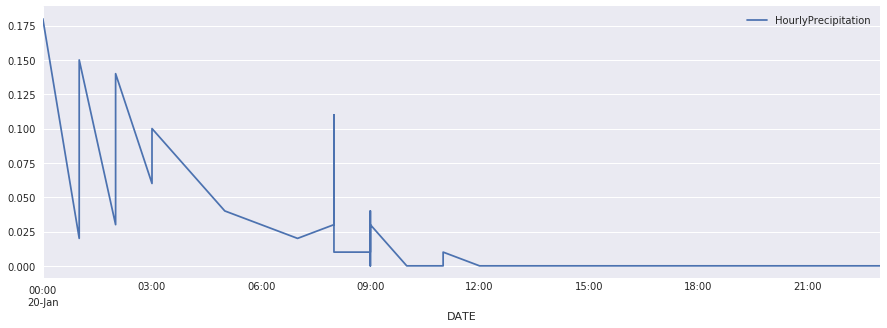

,HourlyPrecipitation
DATE,
2019-01-20 08:00,0.03
2019-01-20 08:00,0.05
2019-01-20 08:00,0.11
2019-01-20 08:00,0.01


In [7]:
plt.rcParams["figure.figsize"] = (15, 5)
dfw['2019/01/20'].plot()
#dfw.plot()
plt.show()
dfw.loc['2019/01/20 08:00:00']
# there seems to be multiple entries per hour so I will groupby 'hour' and sum Precipitation values

#### 9. I have detected multiple entries per hour.
I will groupby 'hour' and sum Precipitation values

In [8]:
# I SUMMARIZE ALL STEPS IN EACH CELL TO AVOID CONFLICTS OF UNTRACKED DF CHANGES

# 1. Overall inspection
dfw = pd.read_csv('../z_resources/data_test/NOAA_CentralPark_Weather.csv',
                  sep=',')
    # Separator is ','. There are NaNs.
    
# 2. For now I am just going to take 2 columns: DATE and PRECIPITATION.
dfw = dfw[['DATE','HourlyPrecipitation']]

# 3. Manage NaNs 
dfw.isnull().sum()
    # there are 5936 NaNs in Precipitation (16% of rows). I will convert them to 0 as if there was no precipitation.
    # I think this is better than removing 16% of the rows.
dfw['HourlyPrecipitation'].fillna('0.00', inplace=True)

# 4. Replace 'T' values of HourlyPrecipitation by 0.00
dfw.loc[(dfw.HourlyPrecipitation == 'T'), 'HourlyPrecipitation'] = '0.00'

# 5. Remove trailing 's' from some Precipitation values
    # I got this error when trying to convert string to float: '0.05s'
    # According to the Data Dictionary s = suspect value (appears with value) 
    # I will remove any trailing 's'.
dfw['HourlyPrecipitation'] = dfw['HourlyPrecipitation'].str.replace('s', '')

# 6. Convert to right data type and units.
dfw['DATE'] = pd.to_datetime(dfw['DATE'])
dfw['HourlyPrecipitation'] = pd.to_numeric(dfw['HourlyPrecipitation'])

# 7. Set timestamp as index to visualize time series
dfw.set_index('DATE', inplace=True)

# 8. Convert the DATE in PERIODS of 1 hour
dfw = dfw.to_period("H")
dfw.info()

# 9. I have detected multiple entries per hour.
    # I will groupby 'hour' and sum Precipitation values
dfw = dfw.resample('H').sum()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 36035 entries, 2017-01-01 00:00 to 2019-12-31 23:00
Freq: H
Data columns (total 1 columns):
HourlyPrecipitation    36035 non-null float64
dtypes: float64(1)
memory usage: 563.0 KB


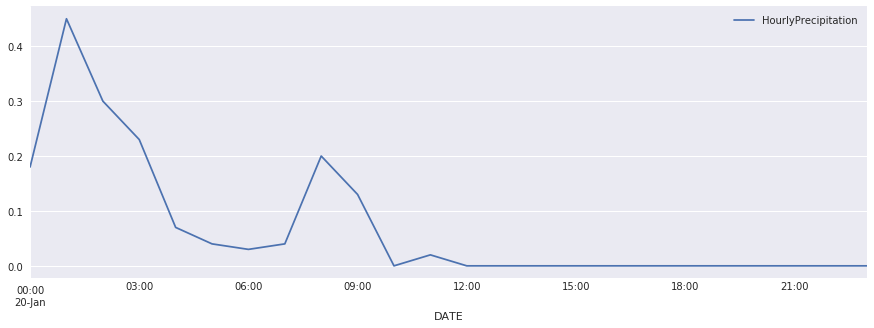

,HourlyPrecipitation
DATE,
2019-12-31 14:00,0.00
2019-12-31 15:00,0.00
2019-12-31 16:00,0.00
2019-12-31 17:00,0.00
2019-12-31 18:00,0.00
2019-12-31 19:00,0.00
2019-12-31 20:00,0.02
2019-12-31 21:00,0.00
2019-12-31 22:00,0.00


In [13]:
plt.rcParams["figure.figsize"] = (15, 5)  # Tamaño por defecto de las gráficas a crear
dfw['2019/01/20'].plot()
#dfw.plot()
plt.show()

# It looks good now
dfw.tail(10)

In [17]:
# Finally I will convert Precipitation units from inches to mm
dfw['HourlyPrecipitation'] = dfw['HourlyPrecipitation']*25.4
dfw.tail(10)

,HourlyPrecipitation
DATE,
2019-12-31 14:00,0.000
2019-12-31 15:00,0.000
2019-12-31 16:00,0.000
2019-12-31 17:00,0.000
2019-12-31 18:00,0.000
2019-12-31 19:00,0.000
2019-12-31 20:00,0.508
2019-12-31 21:00,0.000
2019-12-31 22:00,0.000


#### 10. Convert Precipitation units from inches to mm

In [55]:
# I SUMMARIZE ALL STEPS IN EACH CELL TO AVOID CONFLICTS OF UNTRACKED DF CHANGES

# 1. Overall inspection
dfw = pd.read_csv('../z_resources/data_test/NOAA_CentralPark_Weather.csv',
                  sep=',')
    # Separator is ','. There are NaNs.
    
# 2. For now I am just going to take 2 columns: DATE and PRECIPITATION.
dfw = dfw[['DATE','HourlyPrecipitation']]

# 3. Manage NaNs 
dfw.isnull().sum()
    # there are 5936 NaNs in Precipitation (16% of rows). I will convert them to 0 as if there was no precipitation.
    # I think this is better than removing 16% of the rows.
dfw['HourlyPrecipitation'].fillna('0.00', inplace=True)

# 4. Replace 'T' values of HourlyPrecipitation by 0.00
dfw.loc[(dfw.HourlyPrecipitation == 'T'), 'HourlyPrecipitation'] = '0.00'

# 5. Remove trailing 's' from some Precipitation values
    # I got this error when trying to convert string to float: '0.05s'
    # According to the Data Dictionary s = suspect value (appears with value) 
    # I will remove any trailing 's'.
dfw['HourlyPrecipitation'] = dfw['HourlyPrecipitation'].str.replace('s', '')

# 6. Convert to right data type and units.
dfw['DATE'] = pd.to_datetime(dfw['DATE'])
dfw['HourlyPrecipitation'] = pd.to_numeric(dfw['HourlyPrecipitation'])

# 7. Set timestamp as index to visualize time series
dfw.set_index('DATE', inplace=True)

# 8. Convert the DATE in PERIODS of 1 hour
dfw = dfw.to_period("H")

# 9. I have detected multiple entries per hour.
    # I will groupby 'hour' and sum Precipitation values
dfw = dfw.resample('H').sum()
    # I verify that number of entries should be 24h * 365days * 3years = 26280

# 10. Convert Precipitation units from inches to mm
dfw['HourlyPrecipitation'] = dfw['HourlyPrecipitation']*25.4
dfw.tail(10)

,HourlyPrecipitation
DATE,
2019-12-31 14:00,0.000
2019-12-31 15:00,0.000
2019-12-31 16:00,0.000
2019-12-31 17:00,0.000
2019-12-31 18:00,0.000
2019-12-31 19:00,0.000
2019-12-31 20:00,0.508
2019-12-31 21:00,0.000
2019-12-31 22:00,0.000


#### 11. Convert index back in column and save a csv that can be used afterwards

In [52]:
# I SUMMARIZE ALL STEPS IN EACH CELL TO AVOID CONFLICTS OF UNTRACKED DF CHANGES

# 1. Overall inspection
dfw = pd.read_csv('../z_resources/data_test/NOAA_CentralPark_Weather.csv',
                  sep=',')
    # Separator is ','. There are NaNs.
    
# 2. For now I am just going to take 2 columns: DATE and PRECIPITATION.
dfw = dfw[['DATE','HourlyPrecipitation']]

# 3. Manage NaNs 
dfw.isnull().sum()
    # there are 5936 NaNs in Precipitation (16% of rows). I will convert them to 0 as if there was no precipitation.
    # I think this is better than removing 16% of the rows.
dfw['HourlyPrecipitation'].fillna('0.00', inplace=True)

# 4. Replace 'T' values of HourlyPrecipitation by 0.00
dfw.loc[(dfw.HourlyPrecipitation == 'T'), 'HourlyPrecipitation'] = '0.00'

# 5. Remove trailing 's' from some Precipitation values
    # I got this error when trying to convert string to float: '0.05s'
    # According to the Data Dictionary s = suspect value (appears with value) 
    # I will remove any trailing 's'.
dfw['HourlyPrecipitation'] = dfw['HourlyPrecipitation'].str.replace('s', '')

# 6. Convert to right data type and units.
dfw['DATE'] = pd.to_datetime(dfw['DATE'])
dfw['HourlyPrecipitation'] = pd.to_numeric(dfw['HourlyPrecipitation'])

# 7. Set timestamp as index to visualize time series
dfw.set_index('DATE', inplace=True)

# 8. Convert the DATE in PERIODS of 1 hour
dfw = dfw.to_period("H")

# 9. I have detected multiple entries per hour.
    # I will groupby 'hour' and sum Precipitation values
dfw = dfw.resample('H').sum()
    # I verify that number of entries should be 24h * 365days * 3years = 26280

# 10. Convert Precipitation units from inches to mm
dfw['HourlyPrecipitation'] = dfw['HourlyPrecipitation']*25.4

# 11. Convert index back in column and save a csv that can be used afterwards
dfw.reset_index(level=0, inplace=True)
dfw.to_csv('../data/Data_Weather_Cleaned.csv', index = False, header=True)
read_dfw = pd.read_csv('../data/Data_Weather_Cleaned.csv', sep=',')
read_dfw.sample(10)

,DATE,HourlyPrecipitation
0,2017-01-01 00:00,0.0
1,2017-01-01 01:00,0.0
2,2017-01-01 02:00,0.0
3,2017-01-01 03:00,0.0
4,2017-01-01 04:00,0.0
